# Situazione in Italia

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

data = pd.read_csv("data/famiglie_e_accesso_ad_internet.csv")
data

,ITTER107,Territorio,TIPO_DATO_SDS_ICT,Tipo dato,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2005,2005,34.5,NaN,NaN
1,IT,Italia,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2006,2006,35.6,NaN,NaN
2,IT,Italia,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2007,2007,38.8,NaN,NaN
3,IT,Italia,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2008,2008,42.0,NaN,NaN
4,IT,Italia,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2009,2009,47.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3803,9,50.001 ab. e più,FAM_NO_OTH,altro,2016,2016,7.4,NaN,NaN
3804,9,50.001 ab. e più,FAM_NO_OTH,altro,2017,2017,7.8,NaN,NaN
3805,9,50.001 ab. e più,FAM_NO_OTH,altro,2018,2018,7.9,NaN,NaN
3806,9,50.001 ab. e più,FAM_NO_OTH,altro,2019,2019,8.1,NaN,NaN


In [43]:
zones = ['Nord-ovest', 'Nord-est', 'Centro', 'Sud', 'Isole']

datazsyes = data.loc[list(map(lambda x: x in zones, data['Territorio'])) & 
    (data['TIPO_DATO_SDS_ICT'] == 'FAM_INT_YES')]
datazsyes

,ITTER107,Territorio,TIPO_DATO_SDS_ICT,Tipo dato,TIME,Seleziona periodo,Value,Flag Codes,Flags
112,ITC,Nord-ovest,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2005,2005,36.2,NaN,NaN
113,ITC,Nord-ovest,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2006,2006,38.4,NaN,NaN
114,ITC,Nord-ovest,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2007,2007,41.8,NaN,NaN
115,ITC,Nord-ovest,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2008,2008,44.5,NaN,NaN
116,ITC,Nord-ovest,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2009,2009,48.4,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2811,ITG,Isole,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2016,2016,63.6,NaN,NaN
2812,ITG,Isole,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2017,2017,67.9,NaN,NaN
2813,ITG,Isole,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2018,2018,69.5,NaN,NaN
2814,ITG,Isole,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,2019,2019,71.3,NaN,NaN


In [44]:
years = list(set(datazsyes['TIME'].values))
years.sort()

pop = pd.read_csv('data/popolazione.csv')
pop = pop.loc[
    list(map(lambda x: x in zones or x == 'Italia', pop['Territorio'])) & 
    (pop['Sesso'] == 'totale') &
    (pop['Età'] == 'totale')
]
pop


,ITTER107,Territorio,TIPO_DATO15,Tipo di indicatore demografico,SEXISTAT1,Sesso,ETA1,Età,STATCIV2,Stato civile,TIME,Seleziona periodo,Value,Flag Codes,Flags
40604,IT,Italia,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,58983122,e,dato stimato
40607,ITC,Nord-ovest,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,15848100,e,dato stimato
40694,ITD,Nord-est,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,11561676,e,dato stimato
40781,ITE,Centro,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,11740836,e,dato stimato
40859,ITF,Sud,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,13451861,e,dato stimato
40949,ITG,Isole,JAN,popolazione al 1º gennaio,9,totale,TOTAL,totale,99,totale,2022,2022,6380649,e,dato stimato


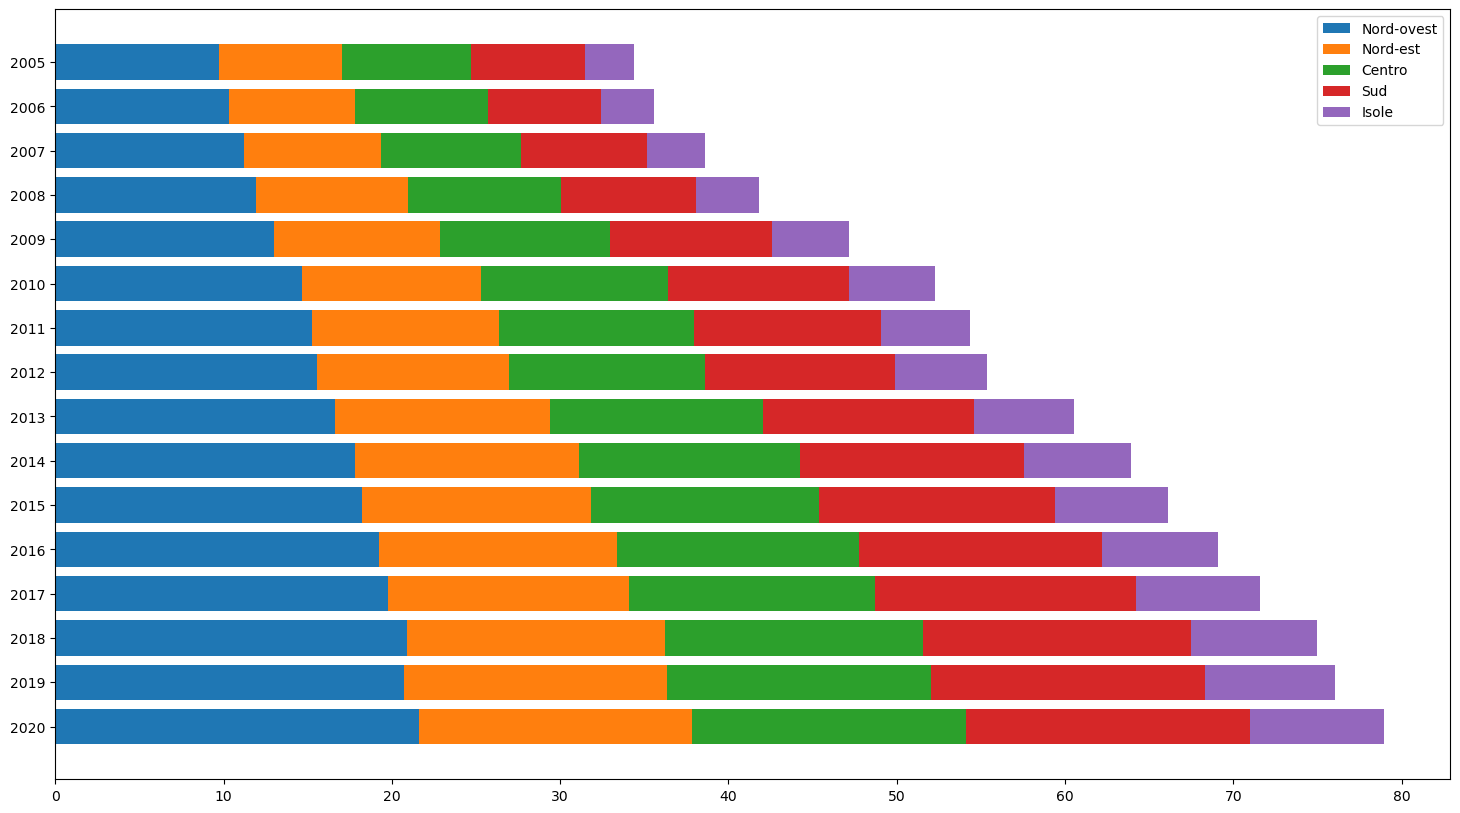

In [45]:
datazsyesn = datazsyes.copy()

for z in zones:
    m = interp1d(
        [0,100], 
        [0,100*pop.loc[pop['Territorio'] == z, 'Value'].iloc[0] / pop.loc[pop['Territorio'] == 'Italia', 'Value'].iloc[0]]
    )
    datazsyesn.loc[datazsyesn['Territorio'] == z, 'Value'] = m(
        datazsyesn.loc[datazsyesn['Territorio'] == z, 'Value']
    )

f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(18)

ax.set_yticks(years)
ax.invert_yaxis()
offsets = [0] * len(years)
for z in zones:
    xd = datazsyesn.loc[datazsyesn['Territorio'] == z, 'Value']
    yd = datazsyesn.loc[datazsyesn['Territorio'] == z, 'TIME']
    ax.barh(yd, xd, left=offsets, label=z)
    for i in range(len(years)):
        offsets[i] += xd.iloc[i]
ax.legend()
plt.show()

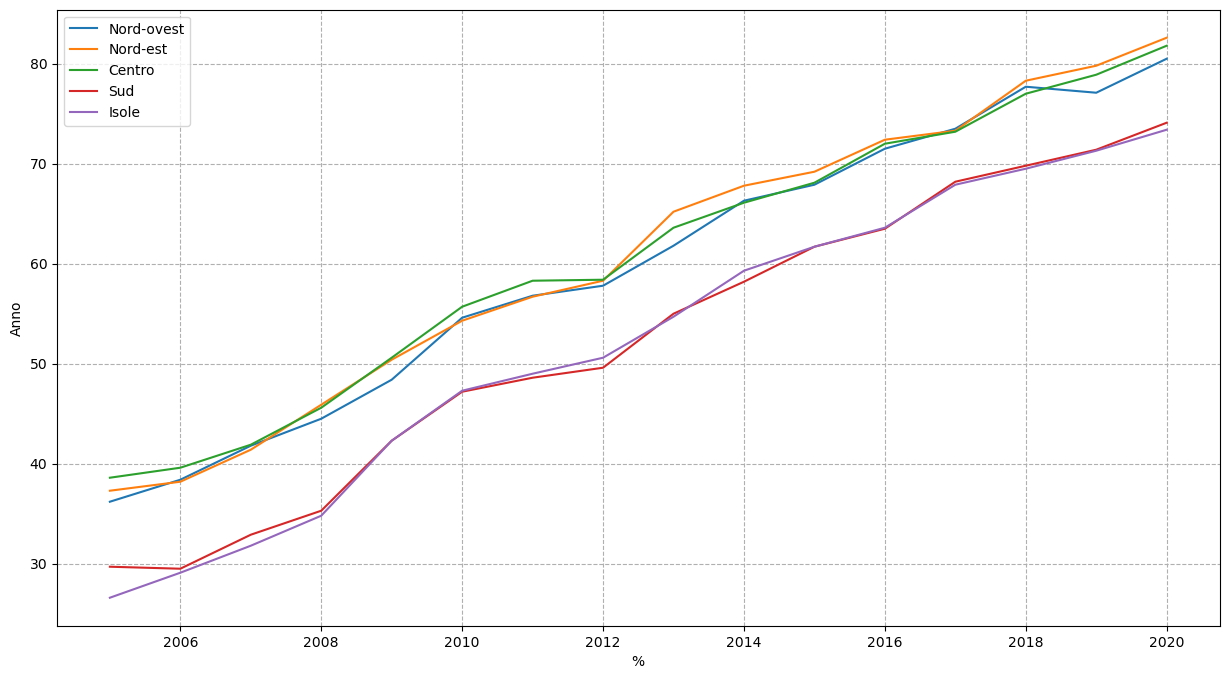

In [46]:
f, ax = plt.subplots()

f.set_figheight(8)
f.set_figwidth(15)

datazsyes = datazsyes.sort_values('TIME')
ax.set_xlabel("%")
ax.set_ylabel("Anno")

for z in zones:
    ax.plot(years, datazsyes.loc[datazsyes['Territorio'] == z, 'Value'], label=z)
ax.legend()
ax.grid(visible=True, linestyle="--")
plt.show()

# Tipo di famiglia

In [47]:
famdat = pd.read_csv('data/tipo_famiglia_accesso_a_internet.csv')
famdat = famdat.loc[famdat['TIPO_DATO_SDS_ICT'] == 'FAM_INT_YES']
famdat

,TIPO_DATO_SDS_ICT,Tipo dato,TIP_FAM,Tipologia familiare,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,HH,totale famiglie,2005,2005,34.5,NaN,NaN
1,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,HH,totale famiglie,2006,2006,35.6,NaN,NaN
2,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,HH,totale famiglie,2007,2007,38.8,NaN,NaN
3,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,HH,totale famiglie,2008,2008,42.0,NaN,NaN
4,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,HH,totale famiglie,2009,2009,47.3,NaN,NaN
...,...,...,...,...,...,...,...,...,...
479,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,OTHER3,altre tipologie,2016,2016,81.1,NaN,NaN
480,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,OTHER3,altre tipologie,2017,2017,83.3,NaN,NaN
481,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,OTHER3,altre tipologie,2018,2018,87.0,NaN,NaN
482,FAM_INT_YES,famiglie che dispongono di accesso a Internet ...,OTHER3,altre tipologie,2019,2019,87.1,NaN,NaN


[]

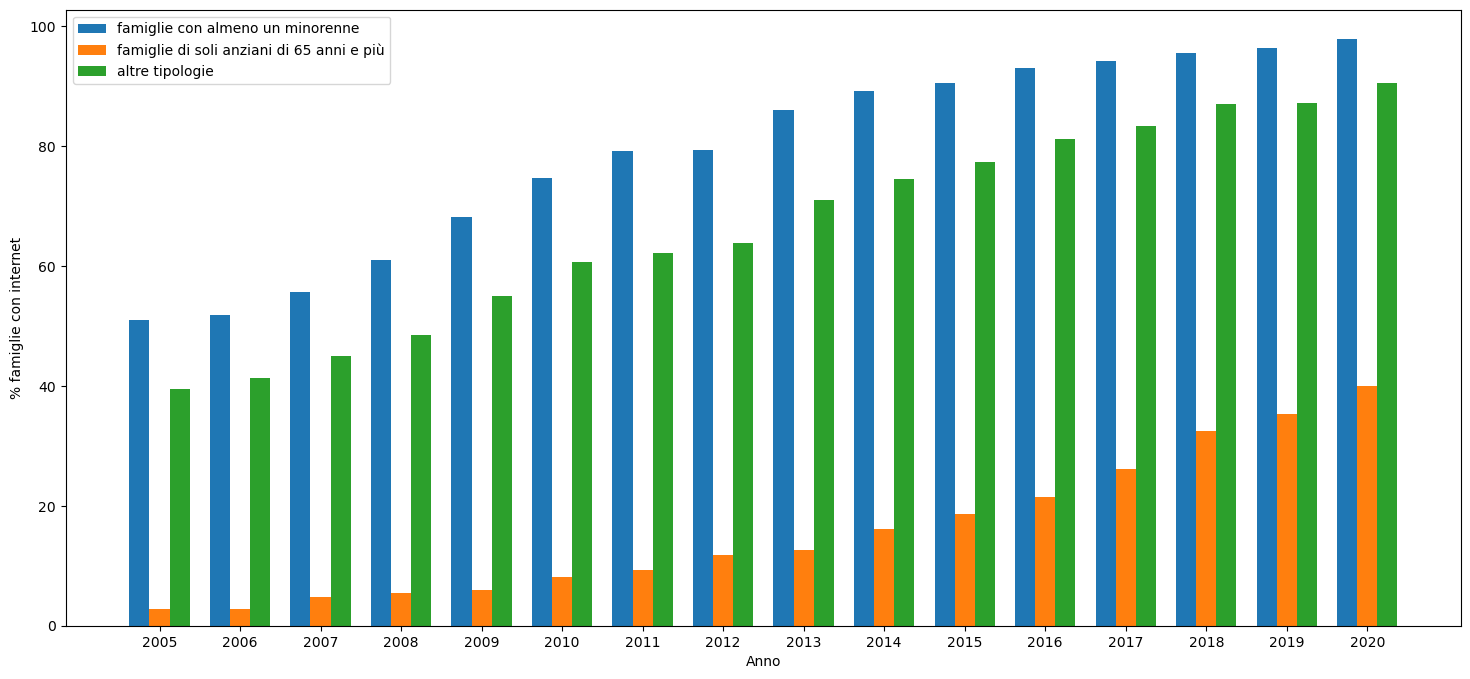

In [48]:
types = list(set(famdat['Tipologia familiare'].values))
types.remove('totale famiglie')

years = list(set(famdat['TIME'].values))
years.sort()

famdat = famdat.sort_values('TIME')

f, ax = plt.subplots()

f.set_figheight(8)
f.set_figwidth(18)

dim = len(types)
w = .75
dimw = w / dim

for i,t in enumerate(types):
    ax.bar(
        list(map(lambda x: x + i*dimw, years)),
        famdat.loc[famdat['Tipologia familiare'] == t, 'Value'],
        dimw, label=t
    )
ax.legend()
ax.set_xlabel("Anno")
ax.set_ylabel("% famiglie con internet")
ax.set_xticks(list(map(lambda x: x+dimw, years)), labels=years)
plt.plot()
    

[]

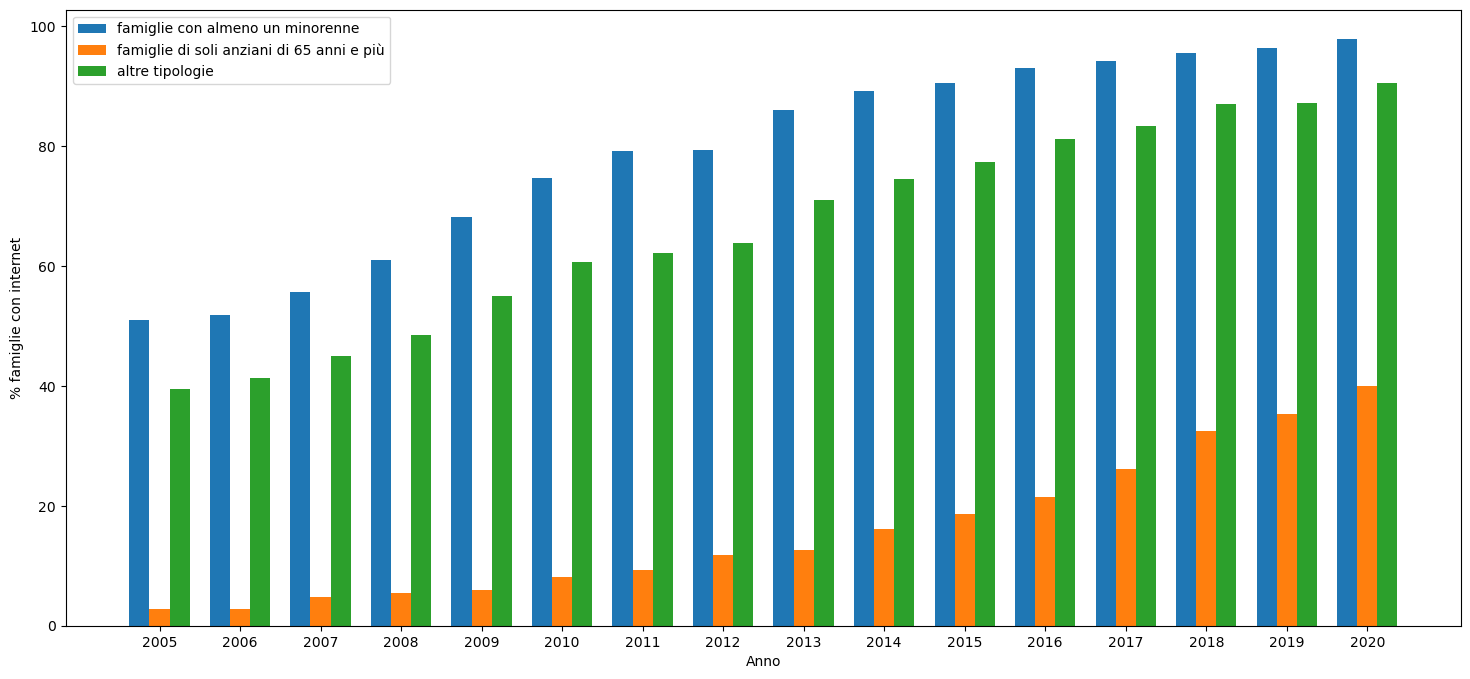

In [48]:
types = list(set(famdat['Tipologia familiare'].values))
types.remove('totale famiglie')

years = list(set(famdat['TIME'].values))
years.sort()

famdat = famdat.sort_values('TIME')

f, ax = plt.subplots()

f.set_figheight(8)
f.set_figwidth(18)

dim = len(types)
w = .75
dimw = w / dim

for i,t in enumerate(types):
    ax.bar(
        list(map(lambda x: x + i*dimw, years)),
        famdat.loc[famdat['Tipologia familiare'] == t, 'Value'],
        dimw, label=t
    )
ax.legend()
ax.set_xlabel("Anno")
ax.set_ylabel("% famiglie con internet")
ax.set_xticks(list(map(lambda x: x+dimw, years)), labels=years)
plt.plot()
    

# Non utilizzatori di internet (percentuale)

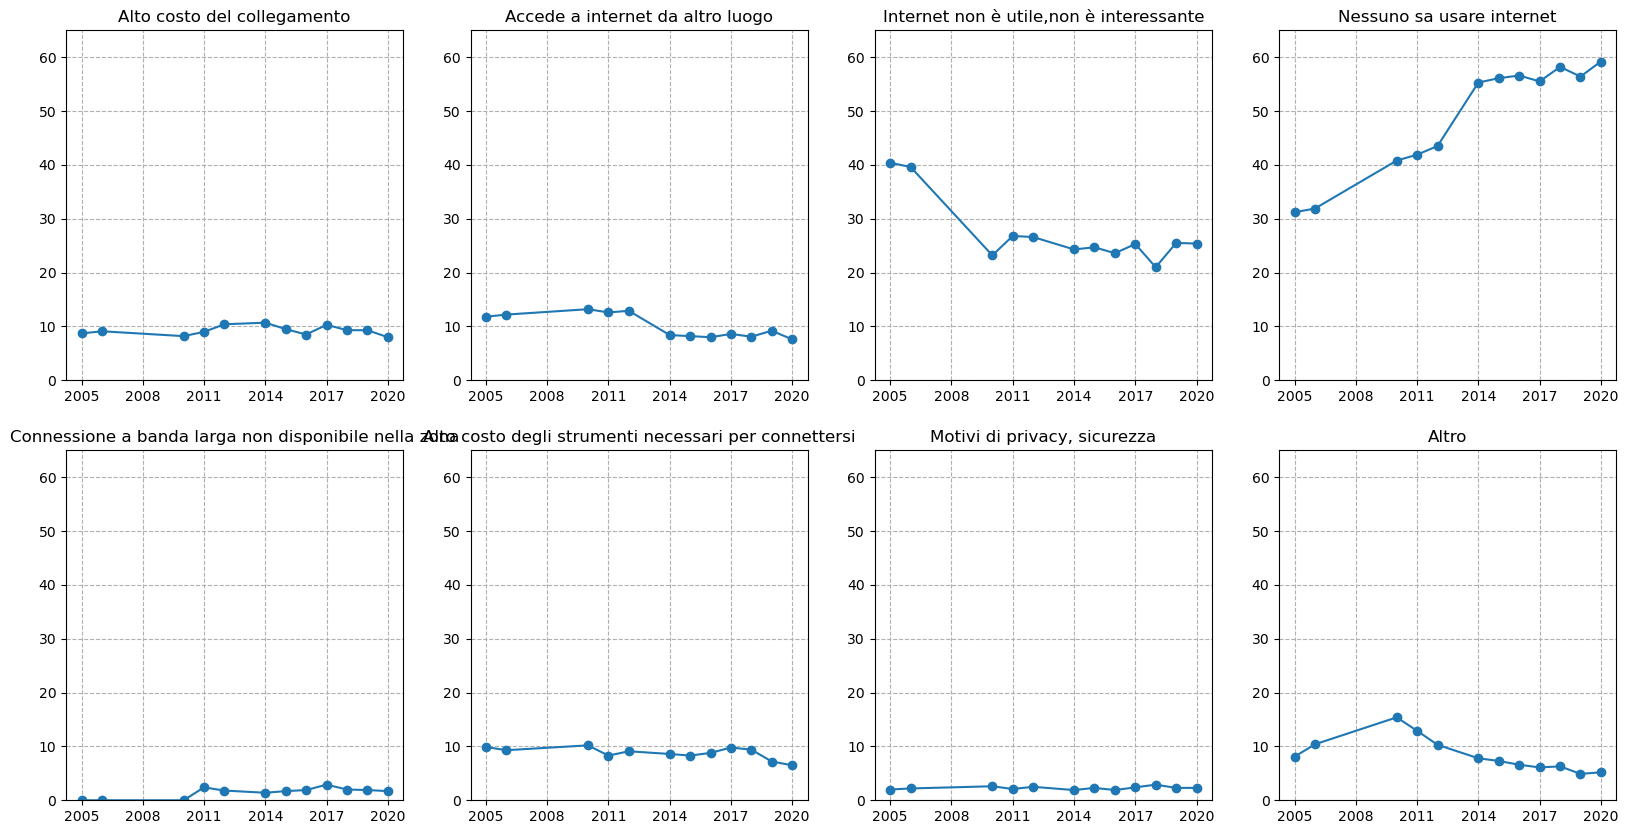

In [49]:
datanaz = data.loc[
    (data['Territorio'] == 'Italia'),
    ['Value', 'Tipo dato', 'TIPO_DATO_SDS_ICT', 'TIME']
]
datanaz

no = datanaz.loc[datanaz['TIPO_DATO_SDS_ICT'] != 'FAM_INT_YES']
no = no.sort_values('TIME')

yes = datanaz.loc[datanaz['TIPO_DATO_SDS_ICT'] == 'FAM_INT_YES']

years = list(set(datanaz['TIME'].values))
years.sort()
types = list(set(datanaz['Tipo dato'].values))
for i in range(len(types)):
    if types[i] == 'altro':
        types[i], types[len(types)-1] = types[len(types)-1], types[i]

yes_str = "famiglie che dispongono di accesso a Internet da casa"

types_noyes = types.copy()
types_noyes.remove(yes_str)

f, axs = plt.subplots(len(types_noyes)//4, 4)
f.set_figheight(10)
f.set_figwidth(20)

for i, t in enumerate(types_noyes):
    ax = axs[i//4, i % 4]
    ax.set_ylim(0, 65)
    ax.plot(
        no.loc[no['Tipo dato'] == t, 'TIME'],
        no.loc[no['Tipo dato'] == t, 'Value'],
        label=t, marker='o'
    )
    ax.set_xticks([years[i] for i in range(0, len(years), 3)])
    ax.grid(visible=True, linestyle="--")
    ax.set_title(t.capitalize())


plt.show()


In [50]:
no = no[['Value', 'Tipo dato', 'TIME']]
print()


for y in years:
    m = interp1d(
        [0,100], 
        [0, 100-yes.loc[yes['TIME'] == y, 'Value'].iloc[0]]
    )
    no.loc[(no['Tipo dato'] != yes_str) & (no['TIME'] == y), 'Value'] = m(
        no.loc[(no['Tipo dato'] != yes_str) & (no['TIME'] == y), 'Value']
    )
no

,Value,Tipo dato,TIME
16,7.7290,accede a Internet da altro luogo,2005
40,6.4845,alto costo degli strumenti necessari per conne...,2005
64,20.4360,nessuno sa usare internet,2005
76,1.3100,"motivi di privacy, sicurezza",2005
28,26.4620,"internet non è utile,non è interessante",2005
...,...,...,...
51,1.3650,alto costo degli strumenti necessari per conne...,2020
39,5.3340,"internet non è utile,non è interessante",2020
27,1.5960,accede a Internet da altro luogo,2020
99,0.3570,connessione a banda larga non disponibile nell...,2020


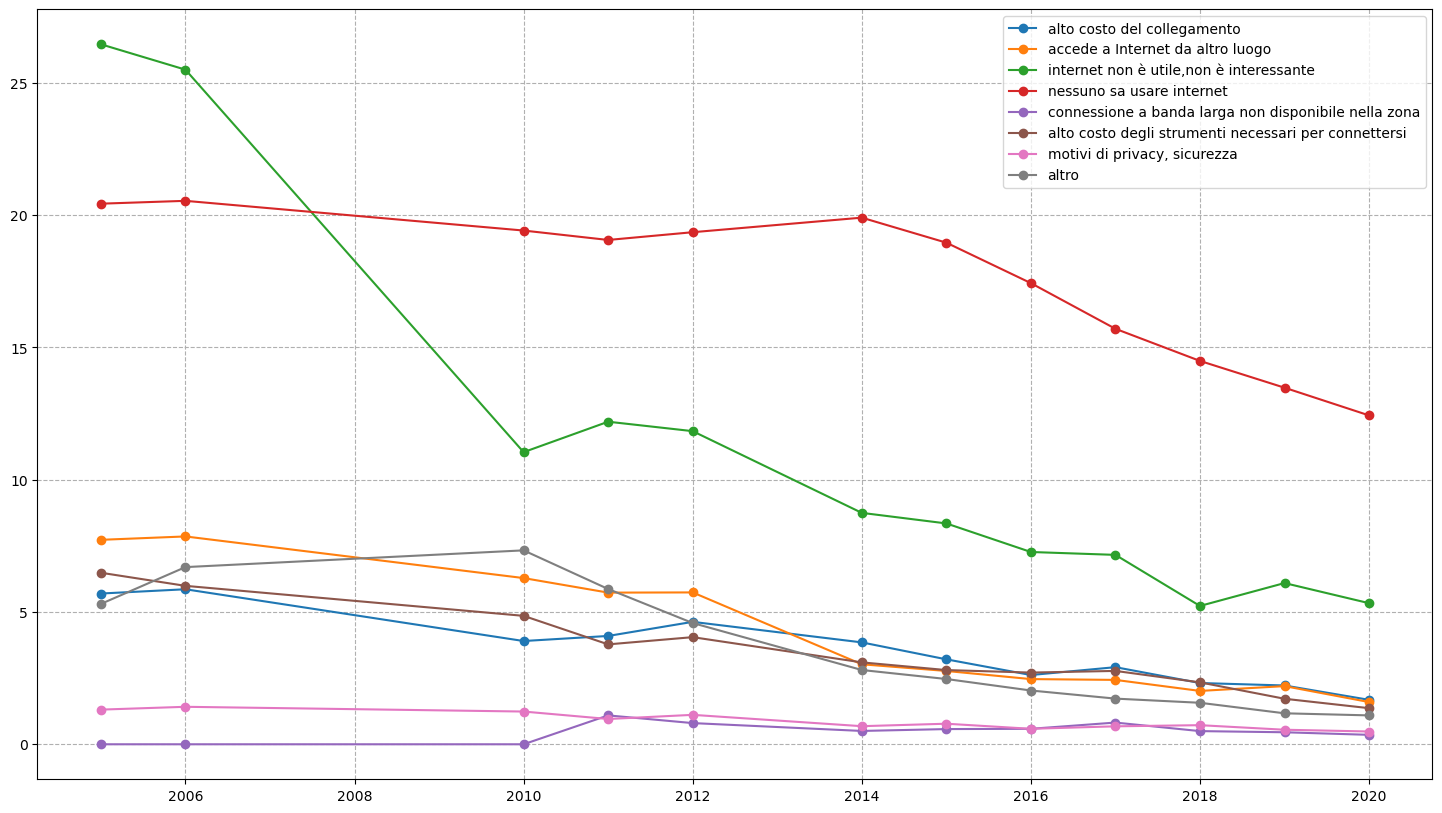

In [51]:
f, ax = plt.subplots()
f.set_figheight(10)
f.set_figwidth(18)

for i, t in enumerate(types_noyes):
    yd = no.loc[no['Tipo dato'] == t, 'Value']
    xd = no.loc[no['Tipo dato'] == t, 'TIME']
    
    if sum(yd) != 0:
        ax.plot(xd, yd, label=t, marker='o')

ax.grid(visible=True, linestyle="--")
ax.legend()
plt.show()

# Interazione con la PA

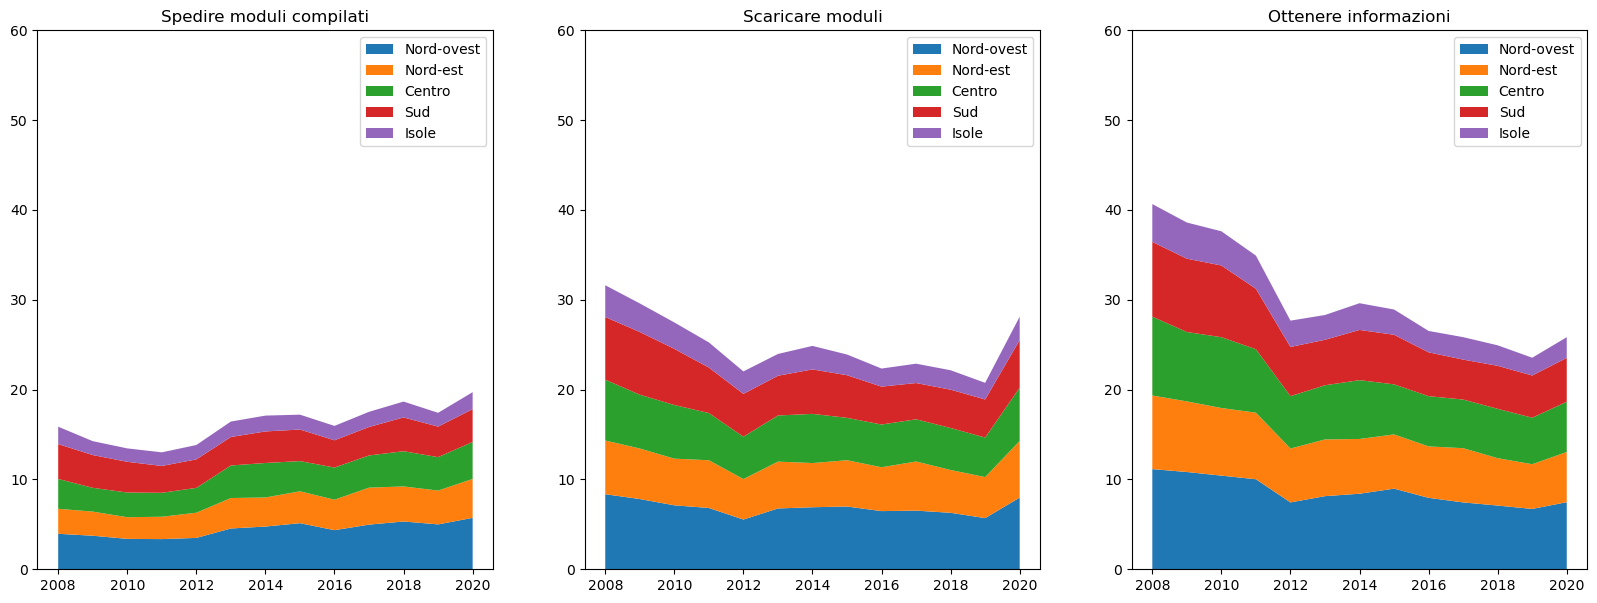

In [56]:
intpa = pd.read_csv('data/interazione_con_la_PA.csv')
intpaz = intpa.loc[map(lambda x: x in zones, intpa['Territorio'])]
intpaz

types = list(set(intpaz['Tipo dato'].values))

intpazn = intpaz.copy()

for z in zones:
    m = interp1d(
        [0,100], 
        [0,100*pop.loc[pop['Territorio'] == z, 'Value'].iloc[0] / pop.loc[pop['Territorio'] == 'Italia', 'Value'].iloc[0]]
    )
    intpazn.loc[intpazn['Territorio'] == z, 'Value'] = m(intpazn.loc[intpazn['Territorio'] == z, 'Value'])

f, axs = plt.subplots(1,len(types))
f.set_figwidth(20)
f.set_figheight(7)

years = list(set(intpazn['TIME'].values))
years.sort()

intpazn = intpazn.sort_values('TIME')

for i, t in enumerate(types): 
    ax = axs[i]
    ax.set_ylim(0,60)
    ax.set_title(t.capitalize())
    yd = intpazn.loc[intpazn['Tipo dato'] == t]\
        .groupby('Territorio')['Value']\
        .apply(list)\
        .to_dict()
    yd = {k:v for k,v in sorted(yd.items(), key=lambda e: zones.index(e[0]))}
    ax.stackplot(
        years,
        yd.values(),
        labels=yd.keys()
    )
    ax.legend()

plt.show()

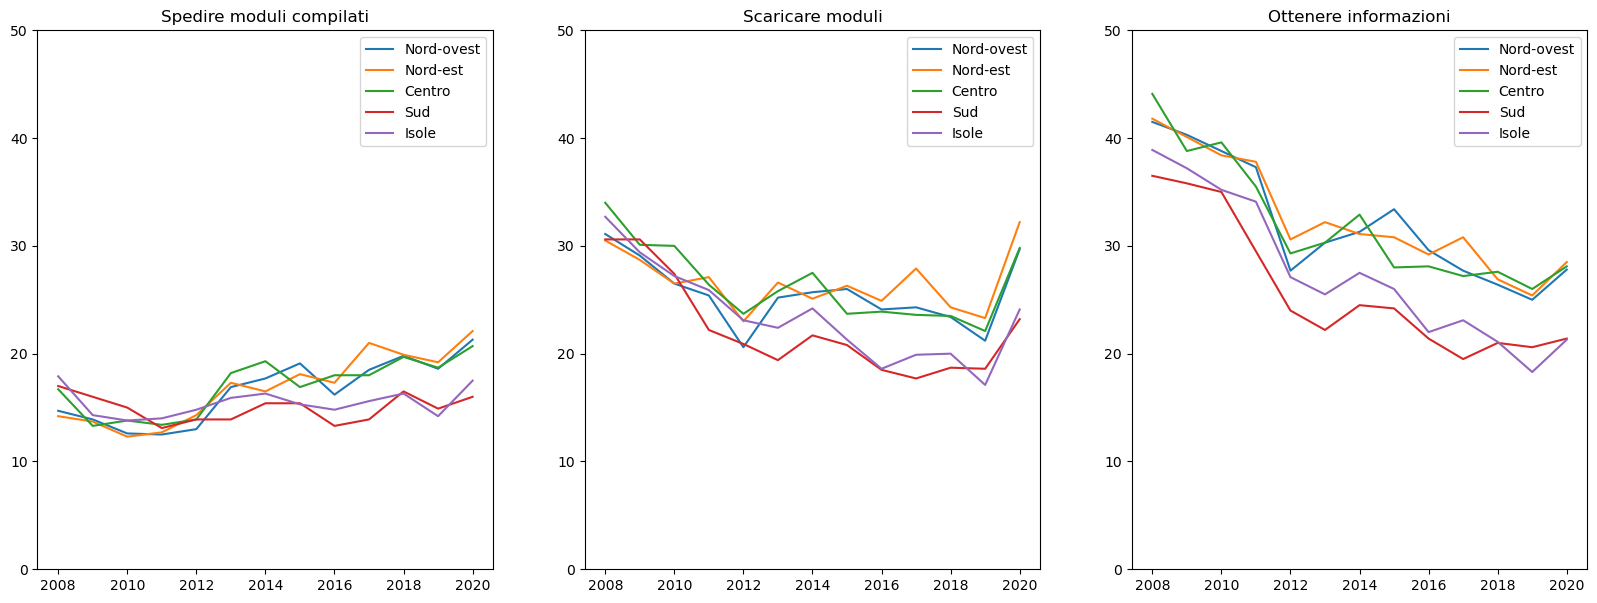

In [53]:
f, axs = plt.subplots(1,3)
f.set_figwidth(20)
f.set_figheight(7)

for i, t in enumerate(types):
    ax = axs[i]
    for z in zones:
        ax.set_ylim(0,50)
        ax.plot(
            years,
            intpaz.loc[(intpaz['Territorio'] == z) & (intpaz['Tipo dato'] == t), 'Value'],
            label=z
        )
    ax.set_title(t.capitalize())
    ax.legend()
plt.show()

# Correlazione diffusione internet e interazione con la PA

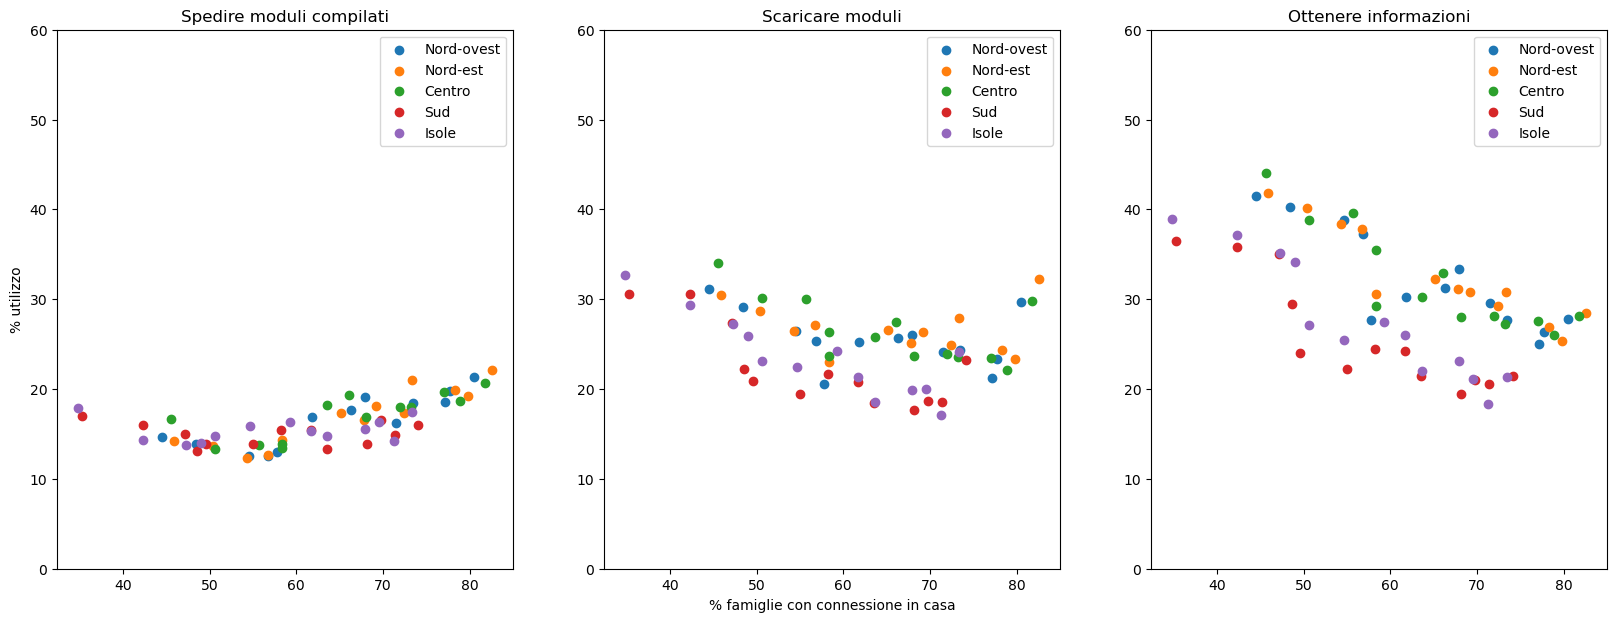

In [54]:
mdf = pd.merge(intpaz,datazsyes,on=['TIME','Territorio'])
f, axs = plt.subplots(1, len(types))
axs[1].set_xlabel("% famiglie con connessione in casa")
axs[0].set_ylabel("% utilizzo")

f.set_figheight(7)
f.set_figwidth(20)

for i, t in enumerate(types):
    ax = axs[i]
    ax.set_ylim(0,60)
    ax.set_title(t.capitalize())
    for z in zones:
        ax.scatter(
            mdf.loc[(mdf['Tipo dato_x'] == t) & (mdf['Territorio'] == z), 'Value_y'],
            mdf.loc[(mdf['Tipo dato_x'] == t) & (mdf['Territorio'] == z), 'Value_x'],
            label=z
        )
    ax.legend()